Recall the signal from Lecture 5. Lets analyze it with Wavelet Transform.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [45]:
def f(x):
  val = (3*np.sin(2*x) + 0.5*np.tanh(0.5*(x-3)) + 0.2*np.exp(-(x- 4)**2)
  + 1.5*np.sin(5*x) + 4*np.cos(3*(x-6)**2))/10 + (x/20)**3

  return val

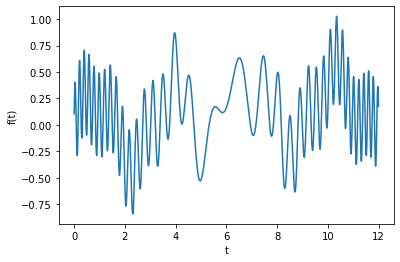

In [46]:
L = 12
N_grid = 2**11

grid = np.linspace(0, L, N_grid+1)
grid = grid[0:N_grid]

f_vals = f(grid)

# plotting f

plt.plot(grid, f_vals)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

/Users/shlizee/opt/anaconda3/lib/python3.9/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


(1.5, 10.0)

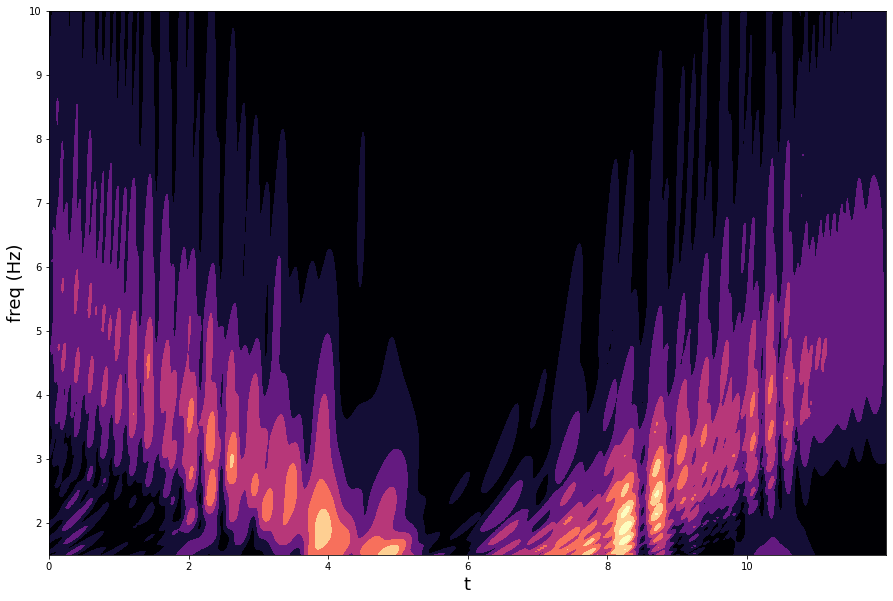

In [69]:
g_scales = np.arange(1, 64)
dt = L/N_grid
[gwc, gwf] = pywt.cwt(f_vals, g_scales, 'cmor', sampling_period=dt)

fig, ax = plt.subplots(figsize=(15, 10))
ax.contourf(grid, gwf, np.abs(gwc), extend='both', cmap='magma')

ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('freq (Hz)', fontsize=18)

ax.set_ylim(1.5, 10)



Example by Ahmet Taspinar (ML Fundamentals)

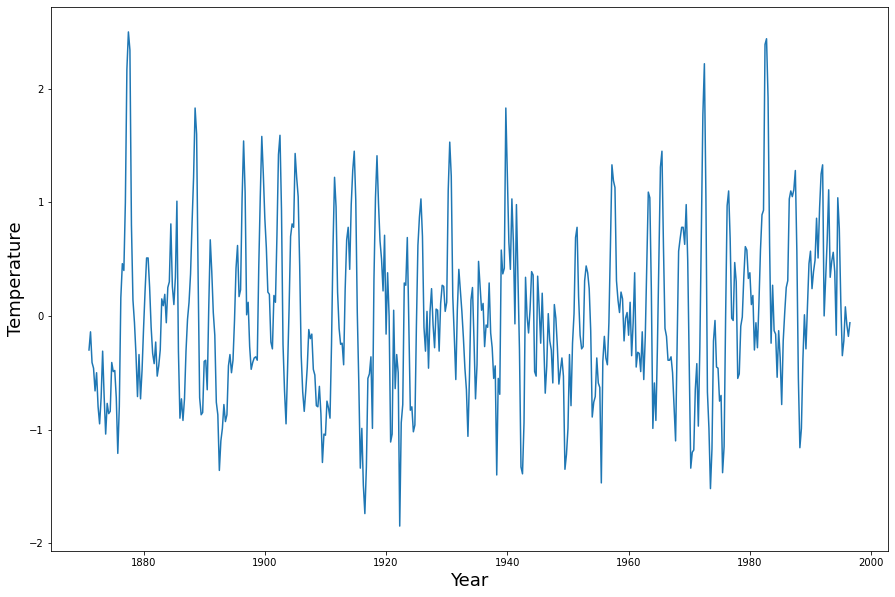

In [49]:
import pandas as pd
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]

t0=1871 # initial year
dt=0.25 # data measured 4 times each year
time = np.arange(0, N) * dt + t0
data = df_nino.values.squeeze()

fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(time, data)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)
plt.show()

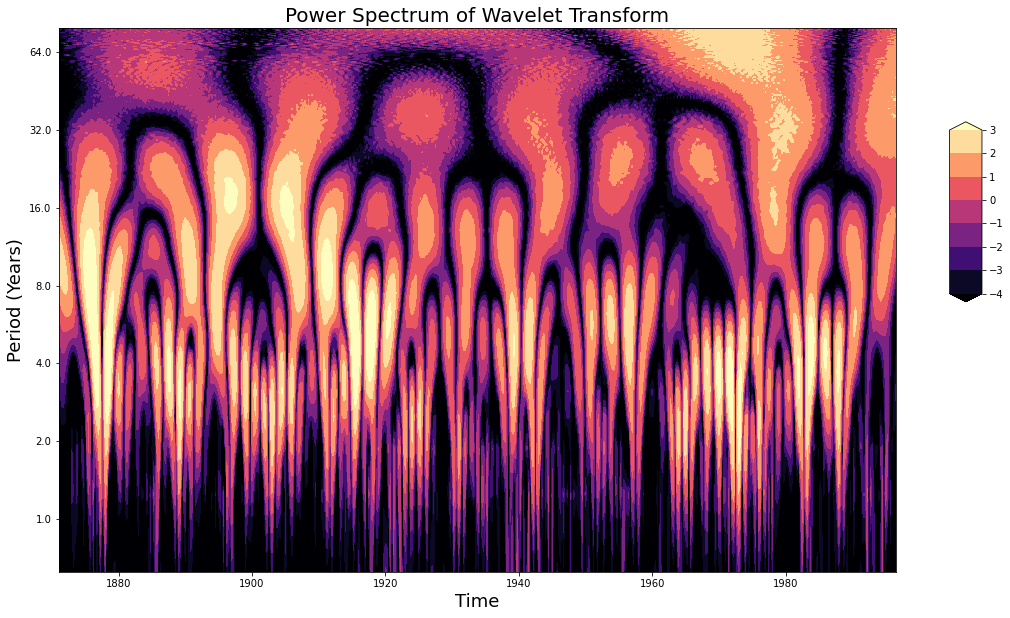

In [50]:
scales = np.arange(1, 128)

[wc, freq] = pywt.cwt(data, scales, 'gaus3', dt)

power = wc**2
period = 1. / freq

levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
contourlevels = np.log2(levels)
    
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap='magma')
    
ax.set_title('Power Spectrum of Wavelet Transform', fontsize=20)    
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Period (Years)', fontsize=18)

yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)
    
cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")
plt.show()

A little interactive demo to play around and get a feel for how the wavelet transform sees different scales. Developed by Prof. B. Hosseini.

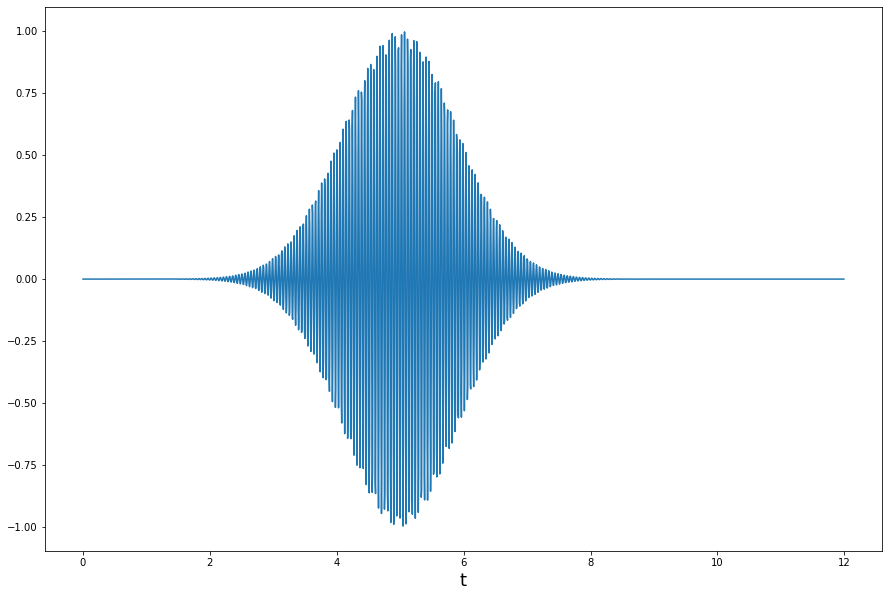

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


/Users/shlizee/opt/anaconda3/lib/python3.9/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Text(0, 0.5, 'freq (Hz)')

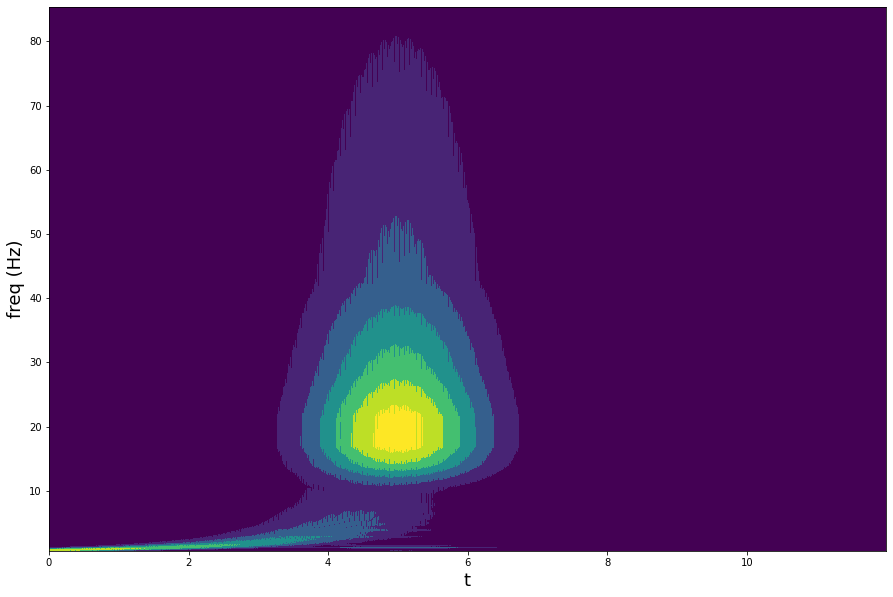

In [95]:
def g(x, kk, ss, tt): 

  val = np.exp( - ( (1/(2*(ss**2)))*(x- tt)**2 ) )*np.sin(kk*np.pi*x)

  return val


k = 300
s = 0.9
t = 5

g_vals = g(grid, k, s, t) #+ g(grid, k/2, s/2, t/2) 

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(grid, g_vals)
ax.set_xlabel('t', fontsize=18)
plt.show()



print(pywt.wavelist(kind='continuous')) # in case you want to change the wavelet

g_scales = np.arange(1, 64)
dt = L/N_grid
[gwc, gwf] = pywt.cwt(g_vals, scales, 'cmor', sampling_period=dt)

fig, ax = plt.subplots(figsize=(15, 10))
ax.contourf(grid, gwf, np.abs(gwc), extend='both')

ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('freq (Hz)', fontsize=18)